# Importing The data and preprocessing

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/Dataset.xlsx - Sheet1.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


There are 9 features and 1 target variable

In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
#checking for null values if any 
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

These empty values are quite low so dropping them

In [ ]:
df.dropna(inplace = True)

Dropping duplicates rows if any

In [ ]:
df.drop_duplicates(inplace=True)

Visualization

Converting the date and times

In [ ]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [ ]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
#DAte 0f journey is now of no use so dropping it 
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [ ]:
#converting the dep time into hours and minutes 
df['Dep_hour']=pd.to_datetime(df["Dep_Time"]).dt.hour
#extracting the minutes 
df['Dep_min']=pd.to_datetime(df["Dep_Time"]).dt.minute

#Now we can drop the date time and it is not of use 
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [ ]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
# Assigning and converting Duration column into list
duration = list(df["Duration"])

In [ ]:
#takign the durations
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [ ]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [ ]:
df.drop(["Duration"], axis = 1, inplace = True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handling the categorical data

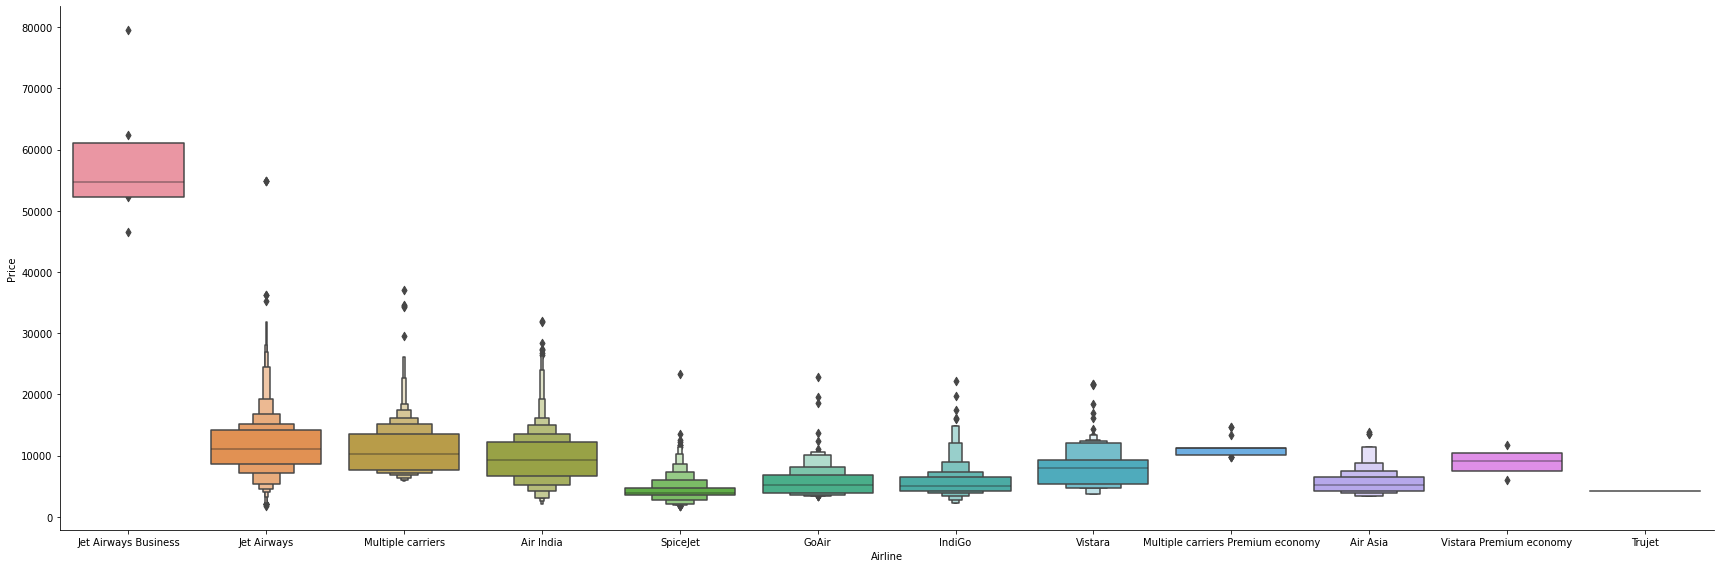

In [ ]:
# Plotting Price vs Airline plot
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

Airline is a Nominal categorical data as we can't assign them any order

In [ ]:
Airline = pd.get_dummies(df[["Airline"]], drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df[["Source"]].value_counts()

Source  
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
dtype: int64

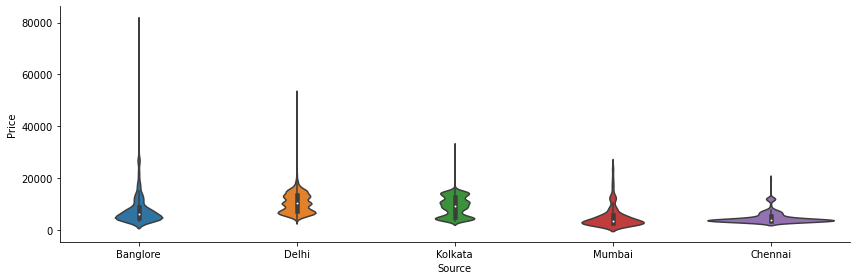

In [ ]:
# Plotting Violin plot for Price vs Source
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

Source is a Nominal categorical data as we can't assign them any order

In [ ]:
Source = pd.get_dummies(df[["Source"]], drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
df["Destination"].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Source is a Nominal categorical data as we can't assign them any order

In [ ]:
Destination = pd.get_dummies(df[["Destination"]], drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df.drop(["Route", "Additional_Info"],axis = 1,inplace = True)

In [ ]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4},inplace = True)

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [ ]:
#Now adding encoded columns to the dataframe 
df_encoded = pd.concat([df, Airline, Source, Destination], axis = 1)

In [ ]:
df_encoded.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [ ]:
df_encoded.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


There are 33 columns total so training will take much time so selecting some features

In [ ]:
X = df_encoded.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


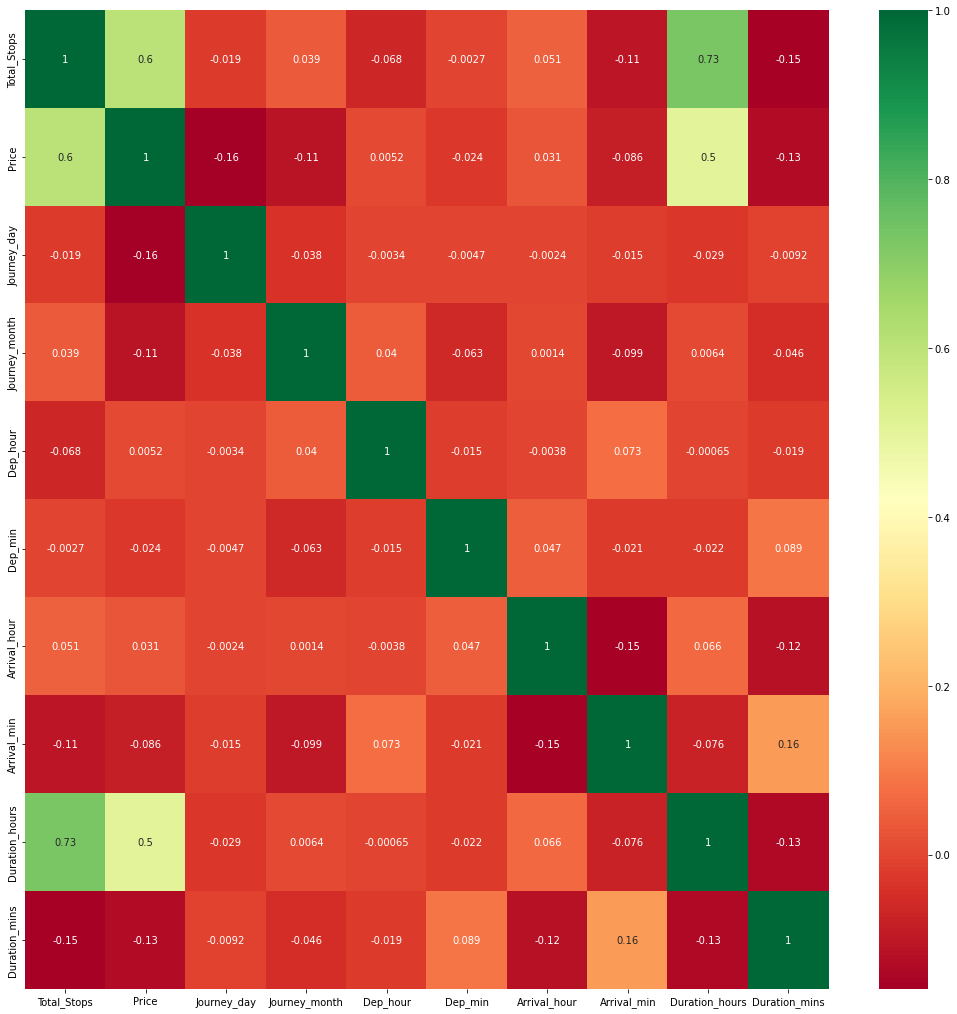

In [ ]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

# Implementing the model

## Random Forest

In [ ]:
y = df_encoded.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train, y_train)

0.9537291293129474

In [ ]:
reg_rf.score(X_test,y_test)

0.8114621754468243

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


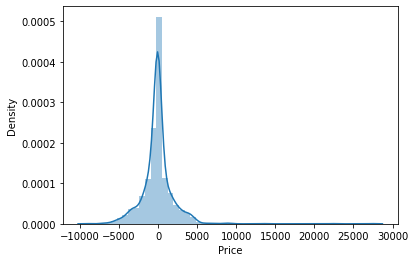

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

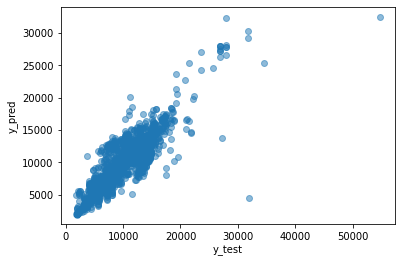

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1184.1359932377839
MSE: 3931065.7496232307
RMSE: 1982.6915417238333


In [ ]:
2090.5509/(max(y)-min(y))

0.026887077025966846

In [ ]:
metrics.r2_score(y_test, y_pred)

0.8114621754468243

### HyperParamter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [ ]:
rf_best=RandomForestRegressor(max_depth= 20,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 15,
 n_estimators= 700)

In [ ]:
rf_best.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [ ]:
y_prediction = rf_best.predict(X_test)

In [ ]:
score_rf=metrics.r2_score(y_test, y_prediction)

In [ ]:
print("The score for Random forest is ",score_rf)

The score for Random forest is  0.831413582260279


## XGboost

In [ ]:
import xgboost as xg

In [ ]:
xgb_r = xg.XGBRegressor(n_estimators = 10, seed = 123)

In [ ]:
xgb_r.fit(X_train, y_train)

[17:16:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=10, seed=123)

In [ ]:
pred_xgb=xgb_r.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


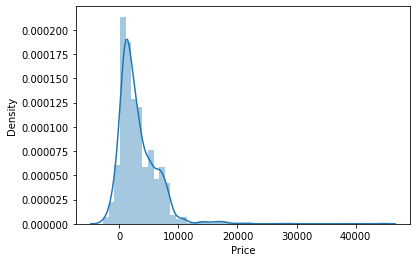

In [ ]:
sns.distplot(y_test-pred_xgb)
plt.show()

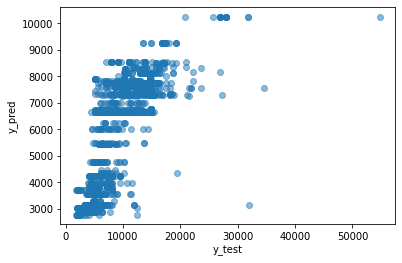

In [ ]:
plt.scatter(y_test, pred_xgb, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1184.1359932377839
MSE: 3931065.7496232307
RMSE: 1982.6915417238333


### HyperParameter Tuning

In [ ]:
max_depth=[5,10,15,20]
n_estimators=[100,500,1000]
n_jobs=[2,5,8,10]
learning_rate=[0.005,0.01,0.05,0.1,1]

In [ ]:
XGB_grid = {'max_depth': max_depth,
               'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate':learning_rate}

In [ ]:
XGB_random = RandomizedSearchCV(estimator = xgb_r, param_distributions = XGB_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42)

In [ ]:
XGB_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[17:16:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .learning_rate=0.005, max_depth=5, n_estimators=100; total time=   0.9s
[17:16:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .learning_rate=0.005, max_depth=5, n_estimators=100; total time=   0.9s
[17:16:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .learning_rate=0.005, max_depth=5, n_estimators=100; total time=   0.9s
[17:16:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .learning_rate=0.005, max_depth=5, n_estimators=100; total time=   0.9s
[17:16:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor o

RandomizedSearchCV(cv=5, estimator=XGBRegressor(n_estimators=10, seed=123),
                   param_distributions={'learning_rate': [0.005, 0.01, 0.05,
                                                          0.1, 1],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
XGB_random.best_params_

{'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 1000}

In [ ]:
xgb_best=xg.XGBRegressor(learning_rate= 0.005, max_depth= 10, n_estimators= 1000,state=42,objectvie='reg:squarederror')

In [ ]:
xgb_best.fit(X_train,y_train)

[17:19:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.005, max_depth=10, n_estimators=1000,
             objectvie='reg:squarederror', state=42)

In [ ]:
y_prediction_xgb = xgb_best.predict(X_test)

In [ ]:
score_xgb=metrics.r2_score(y_test, y_prediction_xgb)

In [ ]:
print("The R2 score for XGB is",score_xgb)

The R2 score for XGB is 0.8407496354735597


## LightGBM

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgb_r=LGBMRegressor()
lgb_r.fit(X_train,y_train)

LGBMRegressor()

In [ ]:
pred_lgb=lgb_r.predict(X_test)

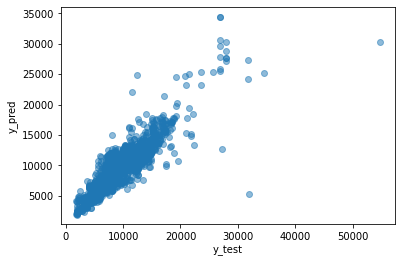

In [ ]:
plt.scatter(y_test, pred_lgb, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

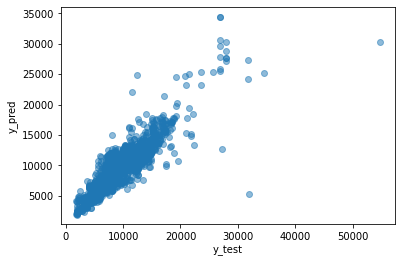

In [ ]:
plt.scatter(y_test, pred_lgb, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### HyperParameter Tuning

In [ ]:
max_depth=[5,10,15,20]
n_estimators=[100,500,1000]
n_jobs=[2,5,8,10]
learning_rate=[0.005,0.01,0.05,0.1,1]
reg_alpha=[0,0.01,0.5,1]

In [ ]:
lgb_grid = {'max_depth': max_depth,
               'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate':learning_rate,
            'reg_aplha':reg_alpha}

In [ ]:
lgb_random = RandomizedSearchCV(estimator = lgb_r, param_distributions = lgb_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42)

In [ ]:
lgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.005, max_depth=15, n_estimators=100, reg_aplha=0; total time=   0.2s
[CV] END learning_rate=0.005, max_depth=15, n_estimators=100, reg_aplha=0; total time=   0.1s
[CV] END learning_rate=0.005, max_depth=15, n_estimators=100, reg_aplha=0; total time=   0.1s
[CV] END learning_rate=0.005, max_depth=15, n_estimators=100, reg_aplha=0; total time=   0.1s
[CV] END learning_rate=0.005, max_depth=15, n_estimators=100, reg_aplha=0; total time=   0.1s
[CV] END learning_rate=0.005, max_depth=5, n_estimators=500, reg_aplha=0.5; total time=   0.6s
[CV] END learning_rate=0.005, max_depth=5, n_estimators=500, reg_aplha=0.5; total time=   0.6s
[CV] END learning_rate=0.005, max_depth=5, n_estimators=500, reg_aplha=0.5; total time=   0.6s
[CV] END learning_rate=0.005, max_depth=5, n_estimators=500, reg_aplha=0.5; total time=   0.6s
[CV] END learning_rate=0.005, max_depth=5, n_estimators=500, reg_aplha=0.5; total time=  

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(),
                   param_distributions={'learning_rate': [0.005, 0.01, 0.05,
                                                          0.1, 1],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'reg_aplha': [0, 0.01, 0.5, 1]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
lgb_random.best_params_

{'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 1000, 'reg_aplha': 1}

In [ ]:
lgb_best=LGBMRegressor(learning_rate= 0.05, max_depth= 20, n_estimators= 1000, reg_aplha= 1,seed=42)

In [ ]:
lgb_best.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.05, max_depth=20, n_estimators=1000, reg_aplha=1,
              seed=42)

In [ ]:
lgb_best.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.05, max_depth=20, n_estimators=1000, reg_aplha=1,
              seed=42)

In [ ]:
y_prediction_lgb=lgb_best.predict(X_test)

In [ ]:
score_lgb=metrics.r2_score(y_test, y_prediction_lgb)

In [ ]:
score_lgb

0.8219500646852804

## Artificial Neural Network

In [ ]:
X_train.shape

(8369, 29)

In [ ]:
import tensorflow as tf

In [ ]:
from keras import Sequential
from keras.layers import Dense

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(50, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                1500      
                                                                 
 dense_6 (Dense)             (None, 100)               5100      
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 26,901
Trainable params: 26,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2)

Epoch 1/500
210/210 [==============================] - 1s 3ms/step - loss: 4927.4355 - mean_absolute_error: 4927.4355 - val_loss: 2760.3708 - val_mean_absolute_error: 2760.3708
Epoch 2/500
210/210 [==============================] - 1s 3ms/step - loss: 2688.0493 - mean_absolute_error: 2688.0493 - val_loss: 2512.4121 - val_mean_absolute_error: 2512.4121
Epoch 3/500
210/210 [==============================] - 1s 3ms/step - loss: 2516.8018 - mean_absolute_error: 2516.8018 - val_loss: 2366.5312 - val_mean_absolute_error: 2366.5312
Epoch 4/500
210/210 [==============================] - 1s 3ms/step - loss: 2329.1562 - mean_absolute_error: 2329.1562 - val_loss: 2192.9409 - val_mean_absolute_error: 2192.9409
Epoch 5/500
210/210 [==============================] - 1s 3ms/step - loss: 2173.4580 - mean_absolute_error: 2173.4580 - val_loss: 2054.5640 - val_mean_absolute_error: 2054.5640
Epoch 6/500
210/210 [==============================] - 1s 2ms/step - loss: 2071.6003 - mean_absolute_error: 2071.60

In [ ]:
pred_nn=NN_model.predict(X_test)

In [ ]:
score_nn=metrics.r2_score(y_test, pred_nn)

In [ ]:
score_nn

0.7564845700587388

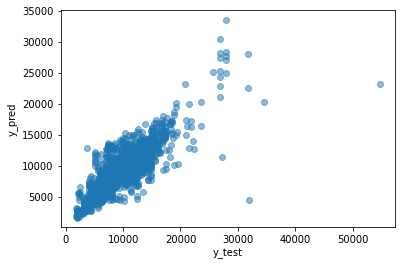

In [ ]:
plt.scatter(y_test, pred_nn, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

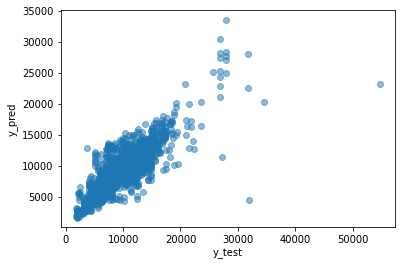

In [ ]:
plt.scatter(y_test, pred_nn, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#Comparing the results of different models

In [ ]:
scores_models=pd.DataFrame(list(zip(['Random Forest Regression','XGBoost regression','LightGBM regression','Artificial Neural Network'],[score_rf,score_xgb,score_lgb,score_nn])),columns=['Model','R2 Score'])

In [ ]:
scores_models

,Model,R2 Score
0,Random Forest Regression,0.831414
1,XGBoost regression,0.840750
2,LightGBM regression,0.821950
3,Artificial Neural Network,0.756485


We can see that Artificial Neural Network has the least R2 score and after tuning it we can also get Best R2 score